# Sequence Masking

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
raw_inputs = [
    [711, 632, 71],
    [73, 8, 3215, 55, 927],
    [83, 91, 1, 645, 1253, 927],
]

padded_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    raw_inputs, padding="post"
)
print(padded_inputs)

[[ 711  632   71    0    0    0]
 [  73    8 3215   55  927    0]
 [  83   91    1  645 1253  927]]


In [3]:
embedding = layers.Embedding(input_dim=5000, output_dim=16, mask_zero=True)
masked_output = embedding(padded_inputs)

print(masked_output._keras_mask)

tf.Tensor(
[[ True  True  True False False False]
 [ True  True  True  True  True False]
 [ True  True  True  True  True  True]], shape=(3, 6), dtype=bool)


In [4]:
masking_layer = layers.Masking()
# padded_inputs 을 3d 텐서로 변경
# embedding dim = 10
unmasked_embedding = tf.cast(
    tf.tile(tf.expand_dims(padded_inputs, axis=-1), [1, 1, 10]), tf.float32
)

masked_embedding = masking_layer(unmasked_embedding)
print(masked_embedding._keras_mask)

tf.Tensor(
[[ True  True  True False False False]
 [ True  True  True  True  True False]
 [ True  True  True  True  True  True]], shape=(3, 6), dtype=bool)


In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

max_features = 10000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128, mask_zero=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=128, 
                    validation_split=0.2,
                    verbose=2)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/nahyeonan/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/nahyeonan/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                20608     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,300,641
Trainable params: 1,300,641
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 - 60s - loss: 0.5016 - acc: 0.7584 - val_loss: 0.5226 - val_acc: 0.8128
Epoch 2/10
157/157 - 65s - loss: 0.3217 - acc: 0.8777 - val_loss: 0.4021 - val_acc: 0.8458
Epoch 3/10
157/157 - 58s - loss: 0.2594 - acc: 0.9046 - val_loss: 0.3112 - val_acc: 0.8786
Epoch 4/10
157/157 - 58s - loss: 0.2249 - acc: 0.9182 - val_loss: 0.3173 - val_acc: 0.8838
Epoch 5/10
1

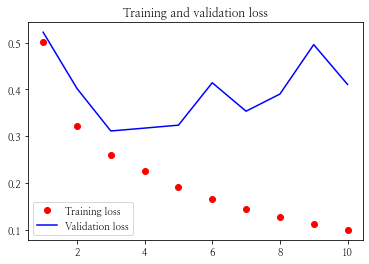

In [6]:
import matplotlib.pyplot as plt

def drawHistory(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(loss) + 1)
    
    plt.figure()
    plt.plot(epochs, loss, 'ro', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()
    
drawHistory(history)